# Preprocessing et exploration de données pour le projet Fraud

In [1]:
# importation des bibliothèques
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import date

In [2]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler,  ClusterCentroids
from imblearn.metrics import classification_report_imbalanced, geometric_mean_score
from sklearn.metrics import f1_score
from sklearn.svm import SVC

In [3]:
# Chargement du jeu de données et aperçu
fraud = pd.read_csv("fraud.csv")
fraud.head()

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,is_fraud
0,22058,2015-02-24 22:55:49,2015-04-18 2:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,7.327584e+08,0
1,333320,2015-06-07 20:39:50,2015-06-08 1:38:54,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,3.503114e+08,0
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2.621474e+09,1
3,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,44,ATGTXKYKUDUQN,SEO,Safari,M,41,3.840542e+09,0
4,221365,2015-07-21 7:09:52,2015-09-09 18:40:53,39,NAUITBZFJKHWW,Ads,Safari,M,45,4.155831e+08,0


In [4]:
# Transformation des colonnes de date au format datetime pour faciliter leur manipulation
fraud.purchase_time = pd.to_datetime(fraud.purchase_time)
fraud.signup_time = pd.to_datetime(fraud.signup_time)

In [5]:
# Infos sur chaque colonne
fraud.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151112 entries, 0 to 151111
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   user_id         151112 non-null  int64         
 1   signup_time     151112 non-null  datetime64[ns]
 2   purchase_time   151112 non-null  datetime64[ns]
 3   purchase_value  151112 non-null  int64         
 4   device_id       151112 non-null  object        
 5   source          151112 non-null  object        
 6   browser         151112 non-null  object        
 7   sex             151112 non-null  object        
 8   age             151112 non-null  int64         
 9   ip_address      151112 non-null  float64       
 10  is_fraud        151112 non-null  int64         
dtypes: datetime64[ns](2), float64(1), int64(4), object(4)
memory usage: 12.7+ MB


In [6]:
# Nombre de valeurs uniques par colonne
fraud.nunique()

user_id           151112
signup_time       151112
purchase_time     150679
purchase_value       122
device_id         137956
source                 3
browser                5
sex                    2
age                   58
ip_address        143511
is_fraud               2
dtype: int64

In [7]:
# Proportion de fraudes dans le jeu de données
print(fraud.is_fraud.value_counts())
print(fraud.is_fraud.value_counts(normalize=True))

0    136961
1     14151
Name: is_fraud, dtype: int64
0    0.906354
1    0.093646
Name: is_fraud, dtype: float64


In [8]:
# Valeurs uniques pour les transactions frauduleuses
fraud[fraud.is_fraud == 1].nunique()

user_id           14151
signup_time       14151
purchase_time     14151
purchase_value       98
device_id          6987
source                3
browser               5
sex                   2
age                  50
ip_address         7277
is_fraud              1
dtype: int64

In [9]:
# Création des colonnes de temps pertinentes
fraud["purchase_date"] = fraud.purchase_time.dt.date
fraud["purchase_hour"] = fraud.purchase_time.dt.hour

In [10]:
fraud["purchase_weekday"] = fraud.purchase_time.dt.weekday

In [11]:
fraud["purchase_month"] = fraud.purchase_time.dt.month

In [12]:
fraud["purchase_day"] = fraud.purchase_time.dt.day

In [13]:
fraud["signup_date"] = fraud.signup_time.dt.date

In [14]:
fraud["days_till_signup"] = fraud.purchase_date - fraud.signup_date

In [15]:
fraud.days_till_signup = fraud.days_till_signup.dt.days

In [16]:
fraud.head()

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,is_fraud,purchase_date,purchase_hour,purchase_weekday,purchase_month,purchase_day,signup_date,days_till_signup
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,7.327584e+08,0,2015-04-18,2,5,4,18,2015-02-24,53
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,3.503114e+08,0,2015-06-08,1,0,6,8,2015-06-07,1
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2.621474e+09,1,2015-01-01,18,3,1,1,2015-01-01,0
3,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,44,ATGTXKYKUDUQN,SEO,Safari,M,41,3.840542e+09,0,2015-05-04,13,0,5,4,2015-04-28,6
4,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,39,NAUITBZFJKHWW,Ads,Safari,M,45,4.155831e+08,0,2015-09-09,18,2,9,9,2015-07-21,50


In [17]:
fraud.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151112 entries, 0 to 151111
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   user_id           151112 non-null  int64         
 1   signup_time       151112 non-null  datetime64[ns]
 2   purchase_time     151112 non-null  datetime64[ns]
 3   purchase_value    151112 non-null  int64         
 4   device_id         151112 non-null  object        
 5   source            151112 non-null  object        
 6   browser           151112 non-null  object        
 7   sex               151112 non-null  object        
 8   age               151112 non-null  int64         
 9   ip_address        151112 non-null  float64       
 10  is_fraud          151112 non-null  int64         
 11  purchase_date     151112 non-null  object        
 12  purchase_hour     151112 non-null  int64         
 13  purchase_weekday  151112 non-null  int64         
 14  purc

## Visualisation des donnéeq

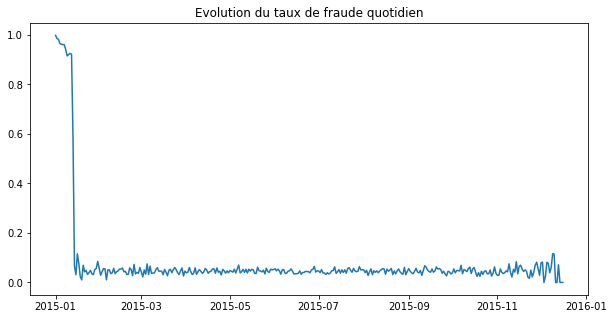

In [18]:
plt.figure(figsize=(10,5))
plt.plot(fraud[["purchase_date", "is_fraud"]].groupby(["purchase_date"]).mean());
plt.title("Evolution du taux de fraude quotidien");

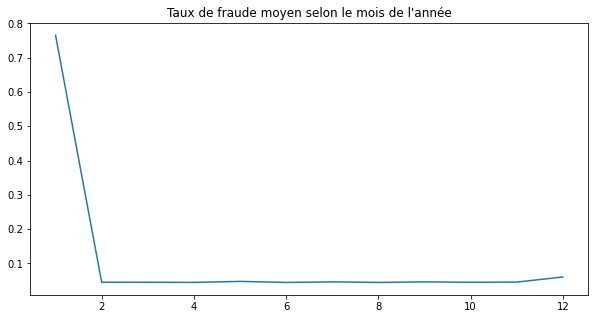

In [19]:
plt.figure(figsize=(10,5))
plt.plot(fraud[["purchase_month", "is_fraud"]].groupby(["purchase_month"]).mean());
plt.title("Taux de fraude moyen selon le mois de l'année");

Text(0.5, 1.0, 'Taux de fraude moyen selon le jour de la semaine')

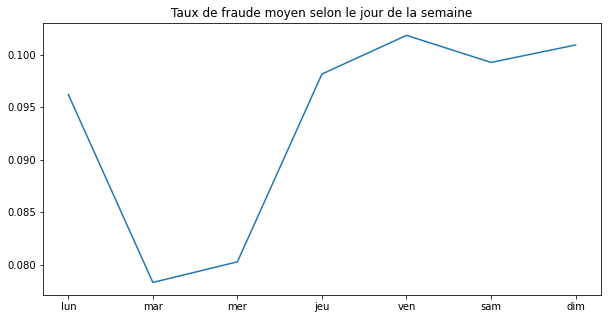

In [20]:
plt.figure(figsize=(10,5))
plt.plot(["lun", "mar", "mer", "jeu", "ven", "sam", "dim"], 
         fraud[["purchase_weekday", "is_fraud"]].groupby(["purchase_weekday"]).mean()["is_fraud"]);
plt.title("Taux de fraude moyen selon le jour de la semaine")

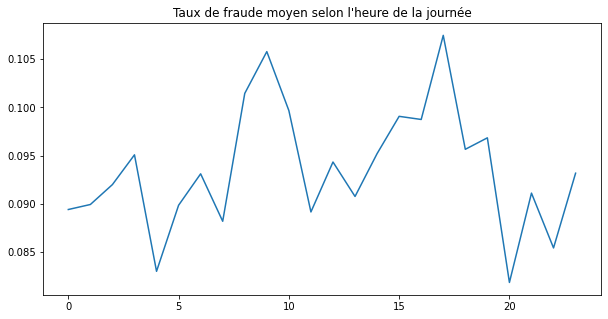

In [21]:
plt.figure(figsize=(10,5))
plt.plot(fraud[["purchase_hour", "is_fraud"]].groupby(["purchase_hour"]).mean());
plt.title("Taux de fraude moyen selon l'heure de la journée");

In [22]:
# Séparation et exploration des données avant et après le 16 Janvier
mask = fraud.purchase_time < '2015-01-16'

In [23]:
fraud1 = fraud.loc[mask]

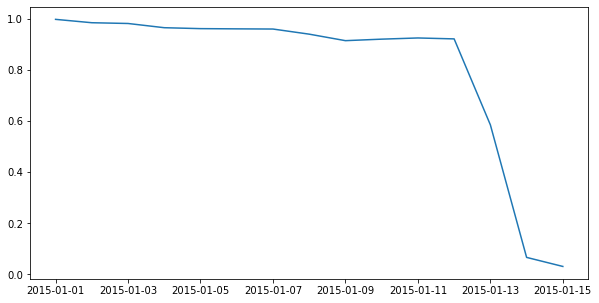

In [24]:
plt.figure(figsize=(10,5))
plt.plot(fraud1[["purchase_date", "is_fraud"]].groupby(["purchase_date"]).mean());

In [25]:
mask = fraud.purchase_time >= '2015-01-16'
fraud2 = fraud.loc[mask]

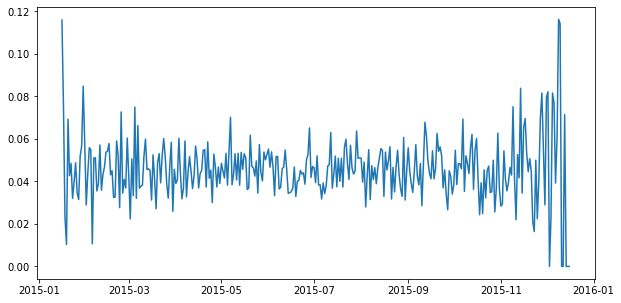

In [26]:
plt.figure(figsize=(10,5))
plt.plot(fraud2[["purchase_date", "is_fraud"]].groupby(["purchase_date"]).mean());

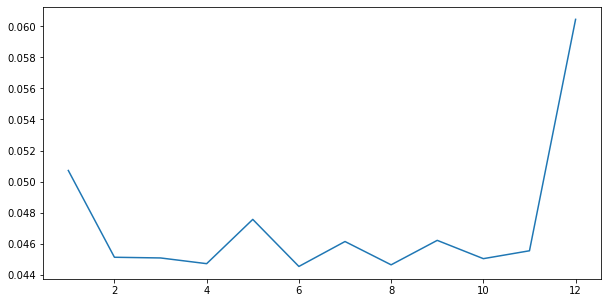

In [27]:
plt.figure(figsize=(10,5))
plt.plot(fraud2[["purchase_month", "is_fraud"]].groupby(["purchase_month"]).mean());

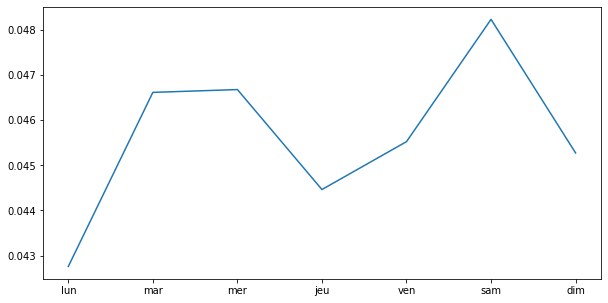

In [28]:
plt.figure(figsize=(10,5))
plt.plot(["lun", "mar", "mer", "jeu", "ven", "sam", "dim"], 
         fraud2[["purchase_weekday", "is_fraud"]].groupby(["purchase_weekday"]).mean()["is_fraud"]);

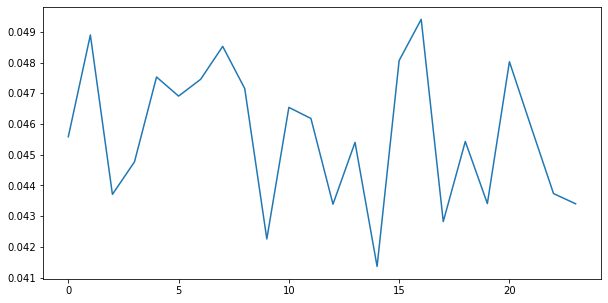

In [29]:
plt.figure(figsize=(10,5))
plt.plot(fraud2[["purchase_hour", "is_fraud"]].groupby(["purchase_hour"]).mean());

## Preprocessing des donées avant modelisation

In [30]:
# Choix des variables quantitatives
data = fraud[["days_till_signup", "purchase_month", "purchase_day", "purchase_weekday", 
              "purchase_hour", "purchase_value", "age"]]

In [31]:
# Choix et encodage des variables catégorielles
data = data.join(pd.get_dummies(fraud[["source", "browser"]], drop_first=True))

In [32]:
data = data.join(fraud.sex.replace(["M", "F"], [0,1]))

In [33]:
data.head()

,days_till_signup,purchase_month,purchase_day,purchase_weekday,purchase_hour,purchase_value,age,source_Direct,source_SEO,browser_FireFox,browser_IE,browser_Opera,browser_Safari,sex
0,53,4,18,5,2,34,39,0,1,0,0,0,0,0
1,1,6,8,0,1,16,53,0,0,0,0,0,0,1
2,0,1,1,3,18,15,53,0,1,0,0,1,0,0
3,6,5,4,0,13,44,41,0,1,0,0,0,1,0
4,50,9,9,2,18,39,45,0,0,0,0,0,1,0


In [34]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151112 entries, 0 to 151111
Data columns (total 14 columns):
 #   Column            Non-Null Count   Dtype
---  ------            --------------   -----
 0   days_till_signup  151112 non-null  int64
 1   purchase_month    151112 non-null  int64
 2   purchase_day      151112 non-null  int64
 3   purchase_weekday  151112 non-null  int64
 4   purchase_hour     151112 non-null  int64
 5   purchase_value    151112 non-null  int64
 6   age               151112 non-null  int64
 7   source_Direct     151112 non-null  uint8
 8   source_SEO        151112 non-null  uint8
 9   browser_FireFox   151112 non-null  uint8
 10  browser_IE        151112 non-null  uint8
 11  browser_Opera     151112 non-null  uint8
 12  browser_Safari    151112 non-null  uint8
 13  sex               151112 non-null  int64
dtypes: int64(8), uint8(6)
memory usage: 10.1 MB


In [35]:
# Définition de la variable cible
target = fraud.is_fraud

## Modélisation

In [36]:
# Séparation en jeu d'entrainement et de test.
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.3, random_state=50)

In [37]:
scaler = preprocessing.MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [38]:
target.value_counts(normalize=True)

0    0.906354
1    0.093646
Name: is_fraud, dtype: float64

In [39]:
from sklearn import ensemble
clf = ensemble.RandomForestClassifier(random_state=321)
clf.fit(X_train, y_train)

RandomForestClassifier(random_state=321)

In [40]:
y_pred = clf.predict(X_test)
pd.crosstab(y_test, y_pred, rownames=["réelles"], colnames=["prédites"])

prédites,0,1
réelles,,
0,41022,9
1,1964,2339


In [41]:
clf.score(X_test, y_test)

0.9564785811973353

In [42]:
print(classification_report_imbalanced(y_test, y_pred))

                   pre       rec       spe        f1       geo       iba       sup

          0       0.95      1.00      0.54      0.98      0.74      0.57     41031
          1       1.00      0.54      1.00      0.70      0.74      0.52      4303

avg / total       0.96      0.96      0.59      0.95      0.74      0.56     45334



## Avec de l'oversampling

In [43]:
ros = RandomOverSampler()
X_ro, y_ro = ros.fit_resample(X_train, y_train)

In [44]:
y_ro.value_counts()

1    95930
0    95930
Name: is_fraud, dtype: int64

In [45]:
clf = ensemble.RandomForestClassifier(random_state=321)
clf.fit(X_ro, y_ro)
y_pred = clf.predict(X_test)
pd.crosstab(y_test, y_pred, rownames=["réelles"], colnames=["prédites"])

prédites,0,1
réelles,,
0,41012,19
1,1964,2339


In [46]:
print(classification_report_imbalanced(y_test, y_pred))

                   pre       rec       spe        f1       geo       iba       sup

          0       0.95      1.00      0.54      0.98      0.74      0.57     41031
          1       0.99      0.54      1.00      0.70      0.74      0.52      4303

avg / total       0.96      0.96      0.59      0.95      0.74      0.56     45334



In [47]:
smo = SMOTE()
X_sm, y_sm = smo.fit_resample(X_train, y_train)
y_sm.value_counts()

1    95930
0    95930
Name: is_fraud, dtype: int64

In [48]:
clf = ensemble.RandomForestClassifier(random_state=321)
clf.fit(X_sm, y_sm)
y_pred = clf.predict(X_test)
pd.crosstab(y_test, y_pred, rownames=["réelles"], colnames=["prédites"])

prédites,0,1
réelles,,
0,41002,29
1,1964,2339


In [49]:
print(classification_report_imbalanced(y_test, y_pred))

                   pre       rec       spe        f1       geo       iba       sup

          0       0.95      1.00      0.54      0.98      0.74      0.57     41031
          1       0.99      0.54      1.00      0.70      0.74      0.52      4303

avg / total       0.96      0.96      0.59      0.95      0.74      0.56     45334



In [50]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

In [51]:
clf1 = KNeighborsClassifier(n_neighbors=3)
clf2 = ensemble.RandomForestClassifier(random_state=123)
clf3 = LogisticRegression(max_iter=1000)
vclf = ensemble.VotingClassifier(estimators = [('knn', clf1), ('rf', clf2)], voting = 'soft')
vclf.fit(X_sm, y_sm)

VotingClassifier(estimators=[('knn', KNeighborsClassifier(n_neighbors=3)),
                             ('rf', RandomForestClassifier(random_state=123))],
                 voting='soft')

In [52]:
y_pred = vclf.predict(X_test)
pd.crosstab(y_test, y_pred, rownames=["réelles"], colnames=["prédites"])

prédites,0,1
réelles,,
0,38171,2860
1,1816,2487


In [53]:
print(classification_report_imbalanced(y_test, y_pred))

                   pre       rec       spe        f1       geo       iba       sup

          0       0.95      0.93      0.58      0.94      0.73      0.56     41031
          1       0.47      0.58      0.93      0.52      0.73      0.52      4303

avg / total       0.91      0.90      0.61      0.90      0.73      0.55     45334



## Enrichissement des variables (device_id)

In [54]:
# On ajoute les variables catégorielle device_id mais encodées
#data = data.join(pd.get_dummies(fraud["device_id"], drop_first=True))

In [55]:
#data.info()